In [1]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = pickle.load(open("X_train.pickle", "rb"))
Y_train = pickle.load(open("Y_train.pickle", "rb"))

X_val = pickle.load(open("X_val.pickle", "rb"))
Y_val = pickle.load(open("Y_val.pickle", "rb"))

X_test = pickle.load(open("X_test.pickle", "rb"))
Y_test = pickle.load(open("Y_test.pickle", "rb"))

In [5]:
model = tf.keras.Sequential()

In [6]:
model.add(tf.keras.layers.Conv2D(32,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu",
                         input_shape = (128,128,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [7]:
model.add(tf.keras.layers.Conv2D(64,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding = "same",
                         activation = "relu"))

In [8]:
model.add(tf.keras.layers.Flatten())

In [9]:
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [10]:
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [11]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [12]:
results = model.fit(X_train, Y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data=(X_val,Y_val))

Epoch 1/50
55/55 [==============================] - 92s 2s/step - loss: 2.3069 - accuracy: 0.1363 - val_loss: 2.1605 - val_accuracy: 0.2635
Epoch 2/50
55/55 [==============================] - 85s 2s/step - loss: 2.0893 - accuracy: 0.2265 - val_loss: 1.8594 - val_accuracy: 0.4101
Epoch 3/50
55/55 [==============================] - 85s 2s/step - loss: 1.9014 - accuracy: 0.3025 - val_loss: 1.7169 - val_accuracy: 0.4204
Epoch 4/50
55/55 [==============================] - 85s 2s/step - loss: 1.7560 - accuracy: 0.3645 - val_loss: 1.4839 - val_accuracy: 0.5189
Epoch 5/50
55/55 [==============================] - 85s 2s/step - loss: 1.6011 - accuracy: 0.4268 - val_loss: 1.3239 - val_accuracy: 0.6082
Epoch 6/50
55/55 [==============================] - 85s 2s/step - loss: 1.4886 - accuracy: 0.4659 - val_loss: 1.2146 - val_accuracy: 0.6277
Epoch 7/50
55/55 [==============================] - 85s 2s/step - loss: 1.4005 - accuracy: 0.5069 - val_loss: 1.1104 - val_accuracy: 0.6483
Epoch 8/50
55/55 [==

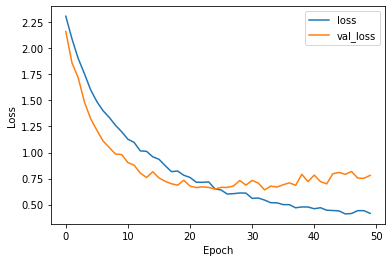

In [13]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

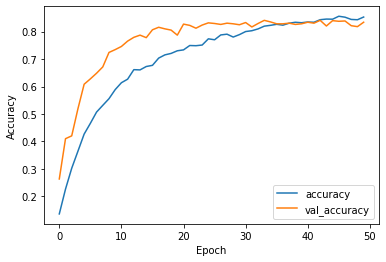

In [14]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [15]:
model.evaluate(X_test, Y_test)

28/28 [==============================] - 3s 90ms/step - loss: 0.8235 - accuracy: 0.8261


[0.8234714269638062, 0.8260869383811951]